In [157]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

# Data Science Framework
* **Define the Problem.** 
* **Gather Data**
* **Prepare Data for Consumptipon** clean data, from raw data to manageable.
* **Perform Exploratory Analysis**, explore, understand, look for patterns, problems, classifications, correlations, comparisions. 
* **Model Data** ML algorithms to learn the data
* **Validate&Implement Data Model** 
* **Optimize**

## Problem
Using the Passenger information to predict their survival in the Titanic tragedy .

In [158]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import sklearn

In [159]:
# load the training set and evaluation data set. 
data_raw = pd.read_csv("./data/train.csv")
data_val = pd.read_csv("./data/test.csv")

In [160]:
# before start to manipulate the original data, deep copy and play on the new dataframe. 
data1 = data_raw.copy(deep=True)

In [161]:
print("Features: ", data1.columns)
print("Number of passangers and properties: ", data1.shape)

Features:  Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')
Number of passangers and properties:  (891, 12)


PassengerId => 乘客ID

Survived => 是否存活

Pclass => 乘客等级(1/2/3等舱位)

Name => 乘客姓名

Sex => 性别

Age => 年龄

SibSp => 堂兄弟/妹个数

Parch => 父母与小孩个数

Ticket => 船票信息

Fare => 票价

Cabin => 客舱

Embarked => 登船港口

In [162]:
print("Features: ", data_val.columns)
print("Number of passangers and properties: ", data_val.shape)

Features:  Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')
Number of passangers and properties:  (418, 11)


There are in total *12* features for each passanger and *891* passanger information available in training data.
*Survived* is a binary code to indicate if the passanger survived. This is the target to be predicted for test dataset. 
But for now, the target doesnt need to be separated, since many operations needed to clean the data first. Do this at last. 

The data_val is the dataset we need to predict survival on. The transformation done on the train dataset better apply on the evaluation dataset too, to achieve same behavior. 

In [163]:
data_clean = [data1, data_val]

In [164]:
data1.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
360,361,0,3,"Skoog, Mr. Wilhelm",male,40.0,1,4,347088,27.9000,NaN,S
802,803,1,1,"Carter, Master. William Thornton II",male,11.0,1,2,113760,120.0000,B96 B98,S
663,664,0,3,"Coleff, Mr. Peju",male,36.0,0,0,349210,7.4958,NaN,S
111,112,0,3,"Zabour, Miss. Hileni",female,14.5,1,0,2665,14.4542,NaN,C
463,464,0,2,"Milling, Mr. Jacob Christian",male,48.0,0,0,234360,13.0000,NaN,S


In [165]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


The data column are both numerical and object, some need to be transferred, like the Survived, it should be a boolean.
There are also lots of missing values(null) in many columns. Explore this later.

In [166]:
print(data1.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [167]:
print(data_val.isnull().sum())

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


## Data cleaning: Correcting, Completing, Creating, Converting
* Correcting: outlier, abnormal data, incorrect data type, .etc
* Completing: missing value, null value, .etc, usually using meadian, mean, mode(which count the frequency, return the most frequent one)
* Creating: generate new features from the exsting feature.
* Converting: datatype formatting, like Data, currency, Boolean, objects, .etc.

When making any change to the dataset, compare the result with the original dataset to see if the change worth it. if there is improvement. 
Backup the data, do not make change on the original data.

There are many missing value for Cabin 687/891, it may not be usable.
The passangerId and Ticket are just random numbers, they should not affect the survival. 
All three columns can be removed from the dataset. 

In [168]:
# Drop the not useful columns
drop_columns = ["Cabin", "Ticket", "PassengerId"]
for col in drop_columns:
    if(col in data1):
        data1.drop(col, inplace=True, axis = 1)
print(data1.columns)

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')


In [169]:
# Fille null/missing values can also using 
# fill the null/missing values for the remain columns,
# for the age, fill na with median value
# for the Embarked, fill na with the most comman value
# for the Fare, using the median value again. 
# Do this for the data1 and data_val, to keep the dataset consistance. 
for dataset in data_clean:
    dataset["Age"].fillna(dataset["Age"].median(), inplace = True)
    # Embarked are place names, no arithmetical operation allowed. 
    # mode function counts the unique value frequency, take the most common value. 
    dataset["Embarked"].fillna(dataset["Embarked"].mode()[0], inplace = True)
    
    dataset["Fare"].fillna(dataset["Fare"].median(), inplace = True)


Can also fill the missing data with ***Random Forest***, it will first fill missing value with median/mean, mode, then using random forest to calculate the sample proximity, how similar between samples, then at last using the proximity matrix to fill the missing values. 

In [170]:
print(data1.isnull().sum())
print("-" * 50)
print(data_val.isnull().sum())

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64
--------------------------------------------------
PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64


Now try to engineer some new features from the existing feature.
1. Family size, how many members are on the cruise. 
2. If the passenger is alone
3. Title, Mr, Miss, .etc. 
4. Cut age to groups instead of a number 
Here just to show how feature engineering works, not every new feature make sence. 

In [171]:
for dataset in data_clean:
    # add the siblings on board with the 
    dataset["FamilySize"] = dataset["SibSp"] + dataset["Parch"] + 1;
    dataset["Alone"] = 1
    dataset["Alone"].loc[dataset["FamilySize"] > 1] = 0
    dataset["Title"] = dataset["Name"].str.split(", ", expand = True)[1].str.split(".", expand = True)[0]
    dataset["FareBin"] = pd.qcut(dataset["Fare"], 4)  # equal cut, every group has same number of elements
    dataset["AgeBin"] = pd.cut(dataset["Age"].astype(int), 5) # the span of each group is same, not equal number of elements.

/Users/shaohuichen/Applications/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [172]:
data1.AgeBin.value_counts()

(16.0, 32.0]     525
(32.0, 48.0]     186
(-0.08, 16.0]    100
(48.0, 64.0]      69
(64.0, 80.0]      11
Name: AgeBin, dtype: int64

In [173]:
min_num_title = 10
print(data1["Title"].mode())
title_names = (data1['Title'].value_counts() < min_num_title) #this will create a true false series with title name as index
print(title_names)
print(title_names.loc["Mr"])
data1["Title"] = data1["Title"].apply(lambda x: "Misc" if title_names.loc[x] == True else x)

0    Mr
dtype: object
Mr              False
Miss            False
Mrs             False
Master          False
Dr               True
Rev              True
Col              True
Major            True
Mlle             True
Jonkheer         True
Sir              True
Ms               True
Lady             True
the Countess     True
Capt             True
Mme              True
Don              True
Name: Title, dtype: bool
False


In [174]:
data1.sample(5)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,Alone,Title,FareBin,AgeBin
241,1,3,"Murphy, Miss. Katherine ""Kate""",female,28.0,1,0,15.5000,Q,2,0,Miss,"(14.454, 31.0]","(16.0, 32.0]"
781,1,1,"Dick, Mrs. Albert Adrian (Vera Gillespie)",female,17.0,1,0,57.0000,S,2,0,Mrs,"(31.0, 512.329]","(16.0, 32.0]"
521,0,3,"Vovk, Mr. Janko",male,22.0,0,0,7.8958,S,1,1,Mr,"(-0.001, 7.91]","(16.0, 32.0]"
510,1,3,"Daly, Mr. Eugene Patrick",male,29.0,0,0,7.7500,Q,1,1,Mr,"(-0.001, 7.91]","(16.0, 32.0]"
532,0,3,"Elias, Mr. Joseph Jr",male,17.0,1,1,7.2292,C,3,0,Mr,"(-0.001, 7.91]","(16.0, 32.0]"


## Convert Formats
Conver the categorical data to dummy variables for mathematical analysis. 
1. Sklean LabelEncoder
2. Sklean OneHotEncoder
3. Pandas Categorical dtype
4. Pandas get_dummies

Encode the labels to numerical value. ["Mr", "Miss"...] to [0, 1, ...].
All the data as categorical data to numerical model.
Using LabelEncoder from sklearn.preprocess

In [175]:
from sklearn.preprocessing import LabelEncoder
label_transfer = LabelEncoder()
for dataset in data_clean:
    # conver the categorical data to numbercal data.
    dataset["Sex_Code"] = label_transfer.fit_transform(dataset["Sex"])
    dataset["Embarked_Code"] = label_transfer.fit_transform(dataset["Embarked"])
    dataset["Title_Code"] = label_transfer.fit_transform(dataset["Title"])
    dataset["AgeBin_Code"] = label_transfer.fit_transform(dataset["AgeBin"])
    dataset["FareBin_Code"] = label_transfer.fit_transform(dataset["FareBin"])

In [179]:
data1.sample(10)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,Alone,Title,FareBin,AgeBin,Sex_Code,Embarked_Code,Title_Code,AgeBin_Code,FareBin_Code
91,0,3,"Andreasson, Mr. Paul Edvin",male,20.0,0,0,7.8542,S,1,1,Mr,"(-0.001, 7.91]","(16.0, 32.0]",1,2,3,1,0
394,1,3,"Sandstrom, Mrs. Hjalmar (Agnes Charlotta Bengt...",female,24.0,0,2,16.7000,S,3,0,Mrs,"(14.454, 31.0]","(16.0, 32.0]",0,2,4,1,2
256,1,1,"Thorne, Mrs. Gertrude Maybelle",female,28.0,0,0,79.2000,C,1,1,Mrs,"(31.0, 512.329]","(16.0, 32.0]",0,0,4,1,3
554,1,3,"Ohman, Miss. Velin",female,22.0,0,0,7.7750,S,1,1,Miss,"(-0.001, 7.91]","(16.0, 32.0]",0,2,2,1,0
784,0,3,"Ali, Mr. William",male,25.0,0,0,7.0500,S,1,1,Mr,"(-0.001, 7.91]","(16.0, 32.0]",1,2,3,1,0
118,0,1,"Baxter, Mr. Quigg Edmond",male,24.0,0,1,247.5208,C,2,0,Mr,"(31.0, 512.329]","(16.0, 32.0]",1,0,3,1,3
478,0,3,"Karlsson, Mr. Nils August",male,22.0,0,0,7.5208,S,1,1,Mr,"(-0.001, 7.91]","(16.0, 32.0]",1,2,3,1,0
284,0,1,"Smith, Mr. Richard William",male,28.0,0,0,26.0000,S,1,1,Mr,"(14.454, 31.0]","(16.0, 32.0]",1,2,3,1,2
704,0,3,"Hansen, Mr. Henrik Juul",male,26.0,1,0,7.8542,S,2,0,Mr,"(-0.001, 7.91]","(16.0, 32.0]",1,2,3,1,0
572,1,1,"Flynn, Mr. John Irwin (""Irving"")",male,36.0,0,0,26.3875,S,1,1,Mr,"(14.454, 31.0]","(32.0, 48.0]",1,2,3,2,2


pands.get_dummies: 
It will take a column and convert all the categorical data to several columns, 
very similar to a OneHotCode! 
s = pd.Series(list('abca'))
pd.get_dummies(s)
   a  b  c
0  1  0  0
1  0  1  0
2  0  0  1
3  1  0  0

In [177]:
Target = ['Survived']

data1_x = ["Sex", "Pclass", "Embarked", "Title", "SibSp", "Parch", "Age", "Fare",
          "FamilySize", "Alone"]

##################################################################################
data1_x_calc = ["Sex_Code", "Pclass", "Embarked_Code", "Title_Code", "SibSp", "Parch", "Age", "Fare"]

data1_xy = Target + data1_x

print("Original X Y: ", data1_xy, '\n')


##################################################################################
data1_x_bin = ["Sex_Code", "Pclass", "Embarked_Code", "Title_Code", "FamilySize", "AgeBin_Code", "FareBin_Code"]

data1_xy_bin = Target + data1_x_bin

print("Bin X Y: ", data1_xy_bin, '\n')

##################################################################################
# pandas.get_dummies: Convert categorical variable into dummy/indicator variables.
data1_dummy = pd.get_dummies(data1[data1_x])
data1_x_dummy = data1_dummy.columns.tolist()
data1_xy_dummy = Target + data1_x_dummy
print("Dummy X Y: ", data1_xy_dummy, '\n')

Original X Y:  ['Survived', 'Sex', 'Pclass', 'Embarked', 'Title', 'SibSp', 'Parch', 'Age', 'Fare', 'FamilySize', 'Alone'] 

Bin X Y:  ['Survived', 'Sex_Code', 'Pclass', 'Embarked_Code', 'Title_Code', 'FamilySize', 'AgeBin_Code', 'FareBin_Code'] 

Dummy X Y:  ['Survived', 'Pclass', 'SibSp', 'Parch', 'Age', 'Fare', 'FamilySize', 'Alone', 'Sex_female', 'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Title_Master', 'Title_Misc', 'Title_Miss', 'Title_Mr', 'Title_Mrs'] 



In [178]:
data1_dummy.head()

,Pclass,SibSp,Parch,Age,Fare,FamilySize,Alone,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Title_Master,Title_Misc,Title_Miss,Title_Mr,Title_Mrs
0,3,1,0,22.0,7.2500,2,0,0,1,0,0,1,0,0,0,1,0
1,1,1,0,38.0,71.2833,2,0,1,0,1,0,0,0,0,0,0,1
2,3,0,0,26.0,7.9250,1,1,1,0,0,0,1,0,0,1,0,0
3,1,1,0,35.0,53.1000,2,0,1,0,0,0,1,0,0,0,0,1
4,3,0,0,35.0,8.0500,1,1,0,1,0,0,1,0,0,0,1,0


In [180]:
print('Train columns with null values: \n', data1.isnull().sum())
print("-"*50)
print (data1.info())
print("-"*50)

print('Test/Validation columns with null values: \n', data_val.isnull().sum())
print("-"*50)
print (data_val.info())
print("-"*50)

data_raw.describe(include = 'all')

Train columns with null values: 
 Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Fare             0
Embarked         0
FamilySize       0
Alone            0
Title            0
FareBin          0
AgeBin           0
Sex_Code         0
Embarked_Code    0
Title_Code       0
AgeBin_Code      0
FareBin_Code     0
dtype: int64
--------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Survived       891 non-null    int64   
 1   Pclass         891 non-null    int64   
 2   Name           891 non-null    object  
 3   Sex            891 non-null    object  
 4   Age            891 non-null    float64 
 5   SibSp          891 non-null    int64   
 6   Parch          891 non-null    int64   
 7   Fare           891 non-nul

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Gallagher, Mr. Martin",male,NaN,NaN,NaN,347082,NaN,C23 C25 C27,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


# Split Training and Testing Data
Split the sample to 80/20 or 75/25 training/testing datasets

In [183]:
from sklearn.model_selection import train_test_split

In [186]:
train1_x, test1_x, train1_y, test1_y = train_test_split(data1[data1_x_calc], data1[Target], random_state = 0)

train1_x_bin, test1_y_bin, train1_y_bin, test1_y_bin = train_test_split(data1[data1_x_bin], data1[Target], random_state = 0)

train1_x_dummy, test1_x_dummy, train1_y_dummy, test1_y_dummy = train_test_split(data1_dummy[data1_x_dummy], data1[Target], random_state = 0)


In [187]:
print("Data1 Shape: {}".format(data1.shape))
print("Train1 Shape: {}".format(train1_x.shape))
print("Test1 Shape: {}".format(test1_x.shape))

Data1 Shape: (891, 19)
Train1 Shape: (668, 8)
Test1 Shape: (223, 8)


In [188]:
train1_x_bin.head()

,Sex_Code,Pclass,Embarked_Code,Title_Code,FamilySize,AgeBin_Code,FareBin_Code
105,1,3,2,3,1,1,0
68,0,3,2,2,7,1,1
253,1,3,2,3,2,1,2
320,1,3,2,3,1,1,0
706,0,2,2,4,1,2,1


In [189]:
train1_x.sample(5)

,Sex_Code,Pclass,Embarked_Code,Title_Code,SibSp,Parch,Age,Fare
189,1,3,2,3,0,0,36.0,7.8958
737,1,1,0,3,0,0,35.0,512.3292
280,1,3,1,3,0,0,65.0,7.7500
761,1,3,2,3,0,0,41.0,7.1250
330,0,3,1,2,2,0,28.0,23.2500


In [190]:
train1_x_dummy.sample(5)

,Pclass,SibSp,Parch,Age,Fare,FamilySize,Alone,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Title_Master,Title_Misc,Title_Miss,Title_Mr,Title_Mrs
321,3,0,0,27.0,7.8958,1,1,0,1,0,0,1,0,0,0,1,0
853,1,0,1,16.0,39.4000,2,0,1,0,0,0,1,0,0,1,0,0
809,1,1,0,33.0,53.1000,2,0,1,0,0,0,1,0,0,0,0,1
497,3,0,0,28.0,15.1000,1,1,0,1,0,0,1,0,0,0,1,0
168,1,0,0,28.0,25.9250,1,1,0,1,0,0,1,0,0,0,1,0


# Exporatory Analysis with Statistics


In [215]:
x = "Alone"
data1[[x, Target[0]]].groupby(x, as_index = False).mean()

,Alone,Survived
0,0,0.505650
1,1,0.303538


In [204]:
# This is only for the categorical datas, 
# Numerical data can be plotted as curves for better visualization.

# This is to see how the feature related to the Target. 
# 0.742 female survived, 0.188 male survived. etc.  
for x in data1_x:
    if data1[x].dtype != "float64":
        print("Survival Correlation by: ", x)
        print(data1[[x, Target[0]]].groupby(x, as_index=False).mean())
        print("-" * 50)

Survival Correlation by:  Sex
      Sex  Survived
0  female  0.742038
1    male  0.188908
--------------------------------------------------
Survival Correlation by:  Pclass
   Pclass  Survived
0       1  0.629630
1       2  0.472826
2       3  0.242363
--------------------------------------------------
Survival Correlation by:  Embarked
  Embarked  Survived
0        C  0.553571
1        Q  0.389610
2        S  0.339009
--------------------------------------------------
Survival Correlation by:  Title
    Title  Survived
0  Master  0.575000
1    Misc  0.444444
2    Miss  0.697802
3      Mr  0.156673
4     Mrs  0.792000
--------------------------------------------------
Survival Correlation by:  SibSp
   SibSp  Survived
0      0  0.345395
1      1  0.535885
2      2  0.464286
3      3  0.250000
4      4  0.166667
5      5  0.000000
6      8  0.000000
--------------------------------------------------
Survival Correlation by:  Parch
   Parch  Survived
0      0  0.343658
1      1  0.55084

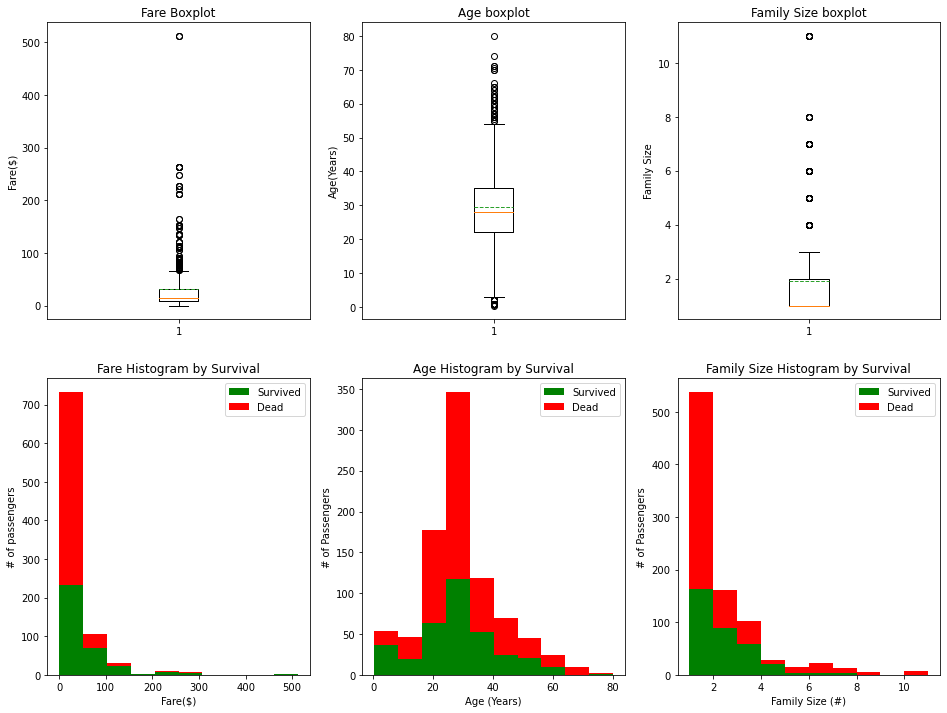

In [221]:
# Plot for the numerical data
plt.figure(figsize=[16, 12])
plt.subplot(231)
plt.boxplot(x = data1.Fare, showmeans = True, meanline = True)
plt.title("Fare Boxplot")
plt.ylabel("Fare($)")

plt.subplot(232)
plt.boxplot(data1["Age"], showmeans = True, meanline = True)
plt.title("Age boxplot")
plt.ylabel("Age(Years)")

plt.subplot(233)
plt.boxplot(data1["FamilySize"], showmeans = True, meanline = True)
plt.title("Family Size boxplot")
plt.ylabel("Family Size")

plt.subplot(234)
plt.hist(x = [data1[data1['Survived']==1]['Fare'], data1[data1['Survived']==0]['Fare']], 
         stacked=True, color = ['g','r'],label = ['Survived','Dead'])
plt.title("Fare Histogram by Survival")
plt.xlabel("Fare($)")
plt.ylabel("# of passengers")
plt.legend()

plt.subplot(235)
plt.hist(x = [data1[data1['Survived']==1]['Age'], data1[data1['Survived']==0]['Age']], 
         stacked=True, color = ['g','r'],label = ['Survived','Dead'])
plt.title('Age Histogram by Survival')
plt.xlabel('Age (Years)')
plt.ylabel('# of Passengers')
plt.legend()

plt.subplot(236)
plt.hist(x = [data1[data1['Survived']==1]['FamilySize'], data1[data1['Survived']==0]['FamilySize']], 
         stacked=True, color = ['g','r'],label = ['Survived','Dead'])
plt.title('Family Size Histogram by Survival')
plt.xlabel('Family Size (#)')
plt.ylabel('# of Passengers')
plt.legend()

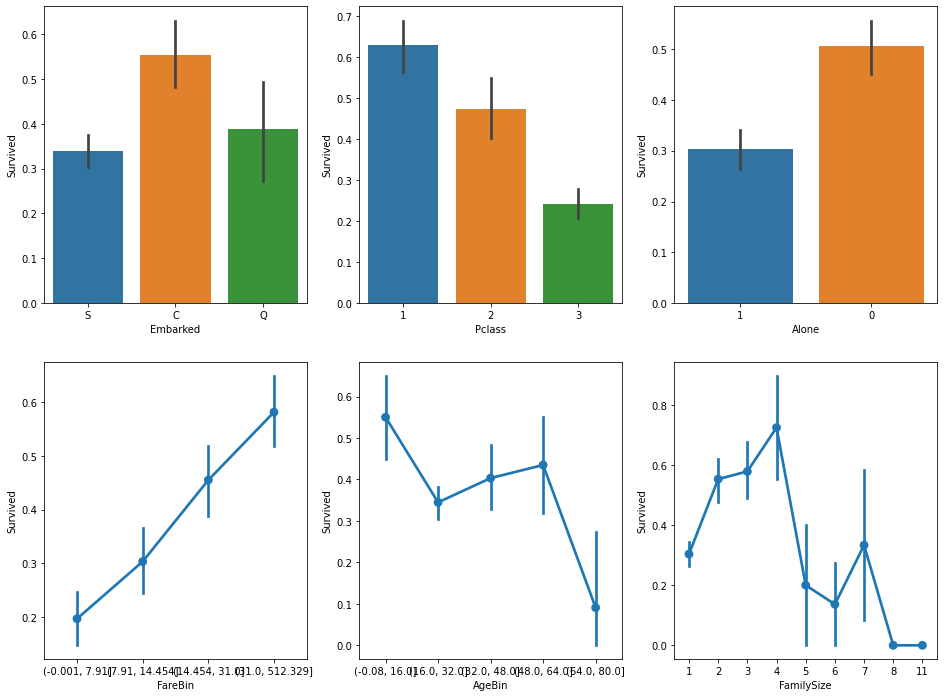

In [227]:
import seaborn as sns
fig, saxis = plt.subplots(2, 3, figsize = (16, 12))

sns.barplot(x = "Embarked", y = "Survived", data = data1, ax = saxis[0, 0])
sns.barplot(x = "Pclass", y = "Survived", order = [1, 2, 3], data = data1, ax = saxis[0, 1])
sns.barplot(x = "Alone", y = "Survived", order = [1, 0], data = data1, ax = saxis[0, 2])

sns.pointplot(x = "FareBin", y = "Survived", data = data1, ax = saxis[1, 0])
sns.pointplot(x = "AgeBin", y = "Survived", data = data1, ax = saxis[1, 1])
sns.pointplot(x = "FamilySize", y = "Survived", data = data1, ax = saxis[1, 2])

Text(0.5, 1.0, 'Pclass vs Family Size Survival Comparision')

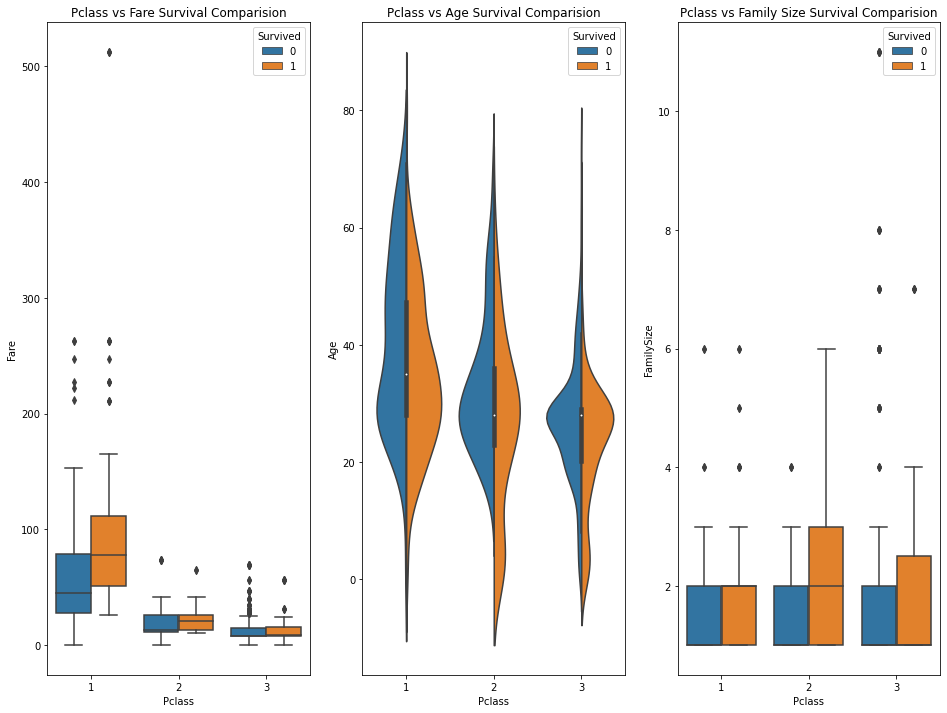

In [230]:
fig, (axis1, axis2, axis3) = plt.subplots(1, 3, figsize = (16, 12))

sns.boxplot(x = "Pclass", y = "Fare", hue = "Survived", data = data1, ax = axis1)
axis1.set_title("Pclass vs Fare Survival Comparision")

sns.violinplot(x = "Pclass", y = "Age", hue = "Survived", data = data1, split = True,ax = axis2)
axis2.set_title("Pclass vs Age Survival Comparision")

sns.boxplot(x = "Pclass", y = "FamilySize", hue = "Survived", data = data1, ax = axis3)
axis3.set_title("Pclass vs Family Size Survival Comparision")

Text(0.5, 1.0, 'Sex vs IsAlone Survival Comparison')

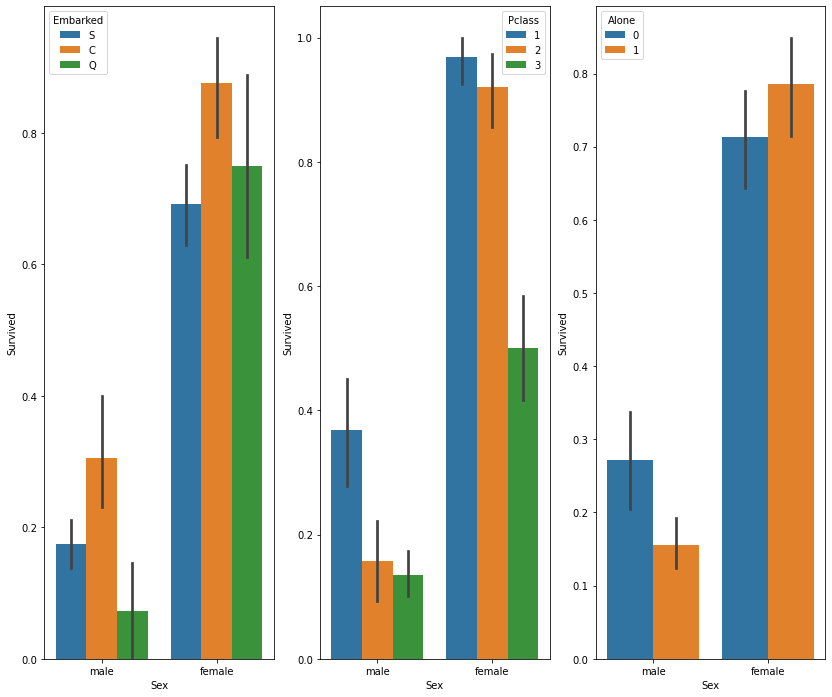

In [232]:
#we know sex mattered in survival, now let's compare sex and a 2nd feature
fig, qaxis = plt.subplots(1,3,figsize=(14,12))

sns.barplot(x = 'Sex', y = 'Survived', hue = 'Embarked', data=data1, ax = qaxis[0])
axis1.set_title('Sex vs Embarked Survival Comparison')

sns.barplot(x = 'Sex', y = 'Survived', hue = 'Pclass', data=data1, ax  = qaxis[1])
axis1.set_title('Sex vs Pclass Survival Comparison')

sns.barplot(x = 'Sex', y = 'Survived', hue = 'Alone', data=data1, ax  = qaxis[2])
axis1.set_title('Sex vs IsAlone Survival Comparison')

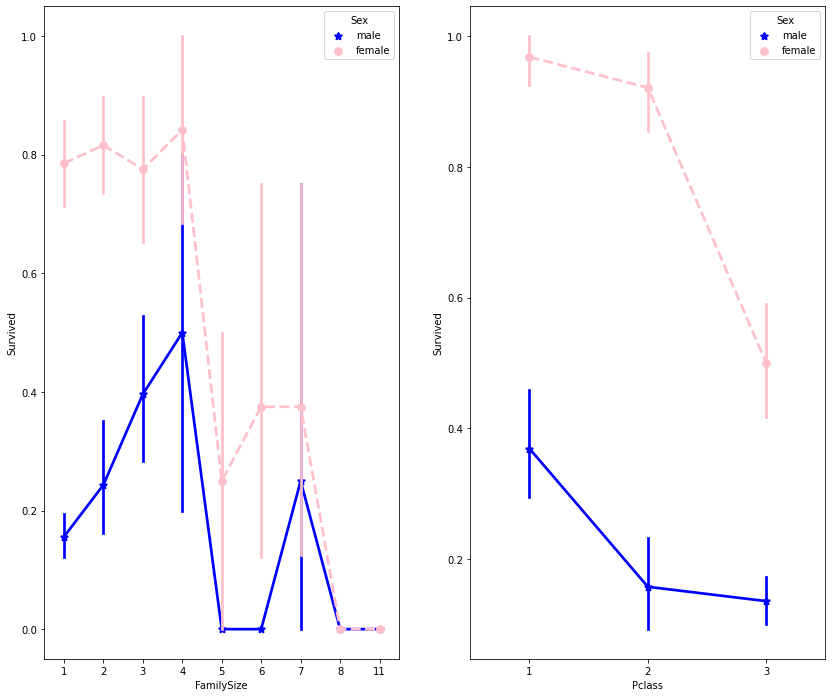

In [233]:
#more side-by-side comparisons
fig, (maxis1, maxis2) = plt.subplots(1, 2,figsize=(14,12))

#how does family size factor with sex & survival compare
sns.pointplot(x="FamilySize", y="Survived", hue="Sex", data=data1,
              palette={"male": "blue", "female": "pink"},
              markers=["*", "o"], linestyles=["-", "--"], ax = maxis1)

#how does class factor with sex & survival compare
sns.pointplot(x="Pclass", y="Survived", hue="Sex", data=data1,
              palette={"male": "blue", "female": "pink"},
              markers=["*", "o"], linestyles=["-", "--"], ax = maxis2)

/Users/shaohuichen/Applications/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:723: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/Users/shaohuichen/Applications/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:728: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


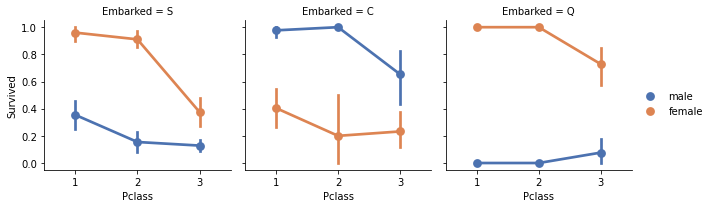

In [234]:
#how does embark port factor with class, sex, and survival compare
#facetgrid: https://seaborn.pydata.org/generated/seaborn.FacetGrid.html
e = sns.FacetGrid(data1, col = 'Embarked')
e.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', ci=95.0, palette = 'deep')
e.add_legend()

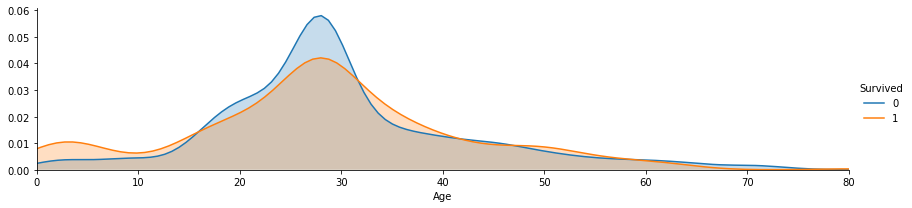

In [235]:
#plot distributions of age of passengers who survived or did not survive
a = sns.FacetGrid( data1, hue = 'Survived', aspect=4 )
a.map(sns.kdeplot, 'Age', shade= True )
a.set(xlim=(0 , data1['Age'].max()))
a.add_legend()

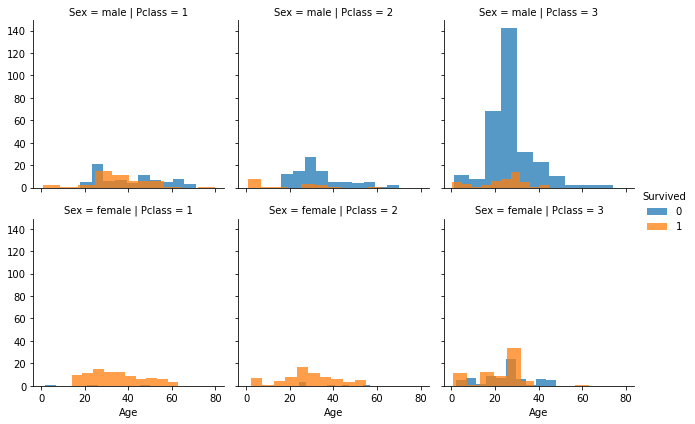

In [236]:
#histogram comparison of sex, class, and age by survival
h = sns.FacetGrid(data1, row = 'Sex', col = 'Pclass', hue = 'Survived')
h.map(plt.hist, 'Age', alpha = .75)
h.add_legend()

/Users/shaohuichen/Applications/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:2071: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/Users/shaohuichen/Applications/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
/Users/shaohuichen/Applications/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
/Users/shaohuichen/Applications/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
/Users/shaohuichen/Applications/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping

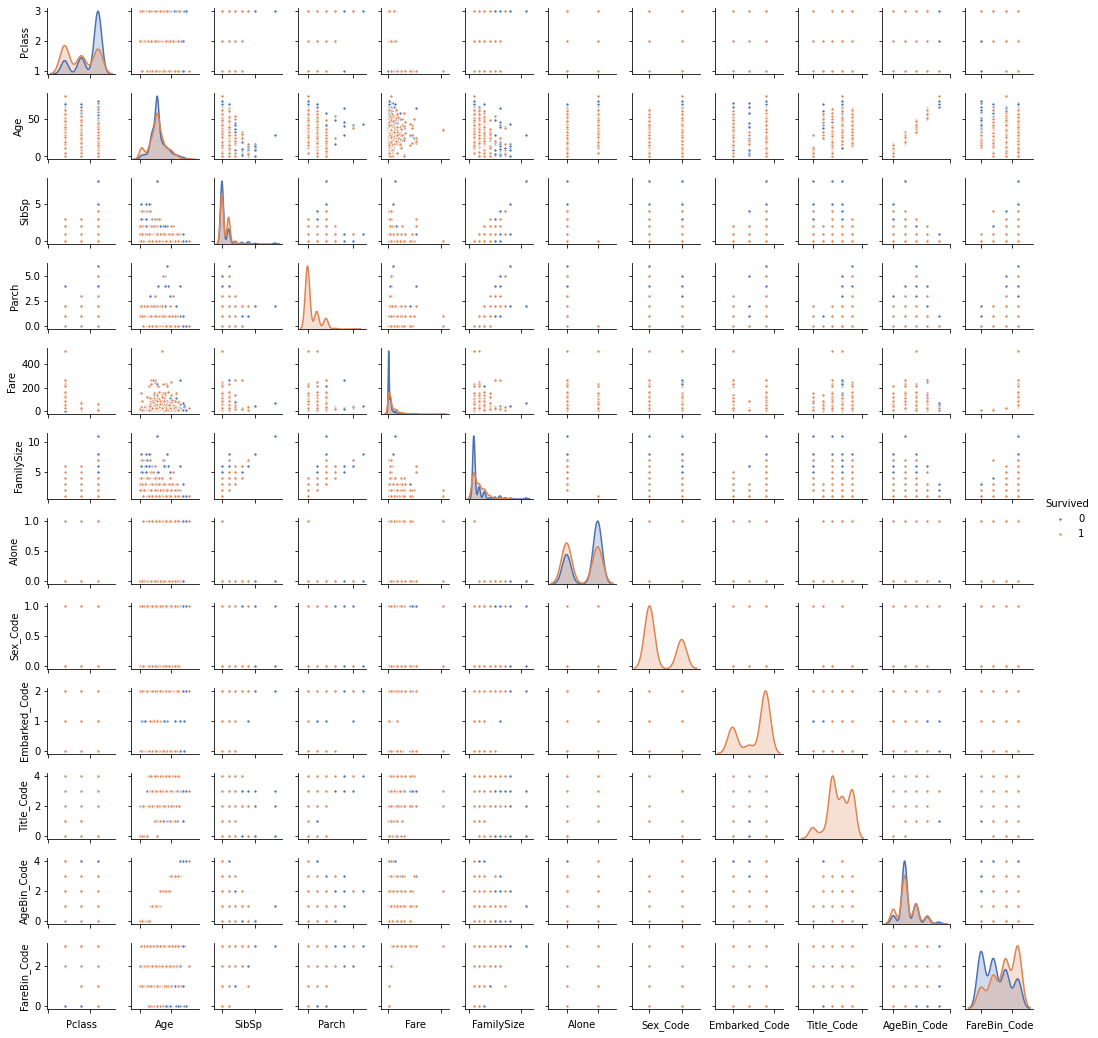

In [237]:
#pair plots of entire dataset
pp = sns.pairplot(data1, hue = 'Survived', palette = 'deep', size=1.2, diag_kind = 'kde', diag_kws=dict(shade=True), plot_kws=dict(s=10) )
pp.set(xticklabels=[])

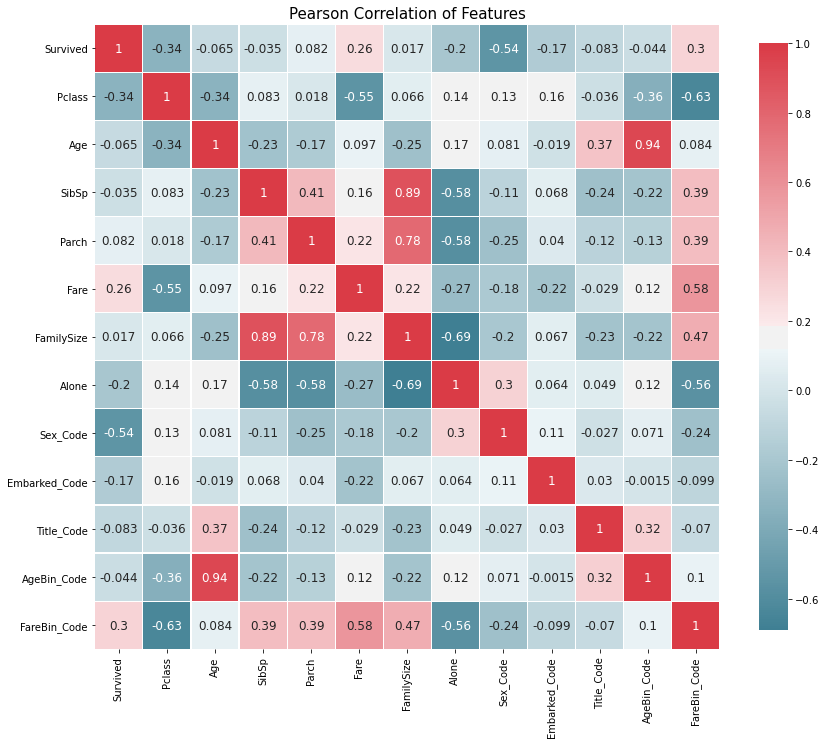

In [238]:
#correlation heatmap of dataset
def correlation_heatmap(df):
    _ , ax = plt.subplots(figsize =(14, 12))
    colormap = sns.diverging_palette(220, 10, as_cmap = True)
    
    _ = sns.heatmap(
        df.corr(), 
        cmap = colormap,
        square=True, 
        cbar_kws={'shrink':.9 }, 
        ax=ax,
        annot=True, 
        linewidths=0.1,vmax=1.0, linecolor='white',
        annot_kws={'fontsize':12 }
    )
    
    plt.title('Pearson Correlation of Features', y=1.05, size=15)

correlation_heatmap(data1)

# Model Data
classification, regression, clustering, or dimensionality reduction
1. Supervised learning
1. Linear Models
1. Linear and Quadratic Discriminant Analysis
1. Kernel ridge regression
1. Support Vector Machines
1. Stochastic Gradient Descent
1. Nearest Neighbors
1. Gaussian Processes
1. Cross decomposition
1. Naive Bayes
1. Decision Trees
1. Ensemble methods
12. Multiclass and multilabel algorithms
1. Feature selection
14. Semi-Supervised
15. Isotonic regression
16. Probability calibration
17. Neural network models (supervised)